In [1]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from cbm_functions import *
from sklearn.model_selection import train_test_split
%matplotlib inline

## loading data
data_dir = "./datasets/"

displays = np.load(data_dir + "displays.npy", "r")
displays_test = np.load(data_dir + "displays_test.npy", "r")

params = np.load(data_dir + "params.npy", "r")
params_test = np.load(data_dir + "params_test.npy", "r")

## display data

#N = 1
#empty_displays = []
#for n in range(N):
#    plt.imshow(displays[n])
#    plt.show()
#    print(params[n])
#    plot_single_event(displays[n], params[n])

## load/save model
#model.save("models/2-conv-params.model")
#model = tf.keras.models.load_model("models/2-conv-params.model")
#model.summary()

In [2]:
## create model
input_shape = displays[0].shape

model = Sequential()
model.add(InputLayer(input_shape))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(4 * 4 * 64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

Epoch 1/30
160/160 [==============================] - 4s 15ms/step - loss: 2.4043 - accuracy: 0.8075 - val_loss: 5.5943 - val_accuracy: 0.4818
Epoch 2/30
160/160 [==============================] - 2s 14ms/step - loss: 1.3555 - accuracy: 0.8581 - val_loss: 6.3304 - val_accuracy: 0.5090
Epoch 3/30
160/160 [==============================] - 2s 14ms/step - loss: 1.1338 - accuracy: 0.8724 - val_loss: 4.1274 - val_accuracy: 0.7945
Epoch 4/30
160/160 [==============================] - 2s 14ms/step - loss: 0.9905 - accuracy: 0.8866 - val_loss: 1.0531 - val_accuracy: 0.8930
Epoch 5/30
160/160 [==============================] - 2s 14ms/step - loss: 0.8914 - accuracy: 0.8911 - val_loss: 0.7741 - val_accuracy: 0.9120
Epoch 6/30
160/160 [==============================] - 2s 14ms/step - loss: 0.8119 - accuracy: 0.9076 - val_loss: 0.4746 - val_accuracy: 0.9635
Epoch 7/30
160/160 [==============================] - 2s 14ms/step - loss: 0.7465 - accuracy: 0.9204 - val_loss: 0.4343 - val_accuracy: 0.9675

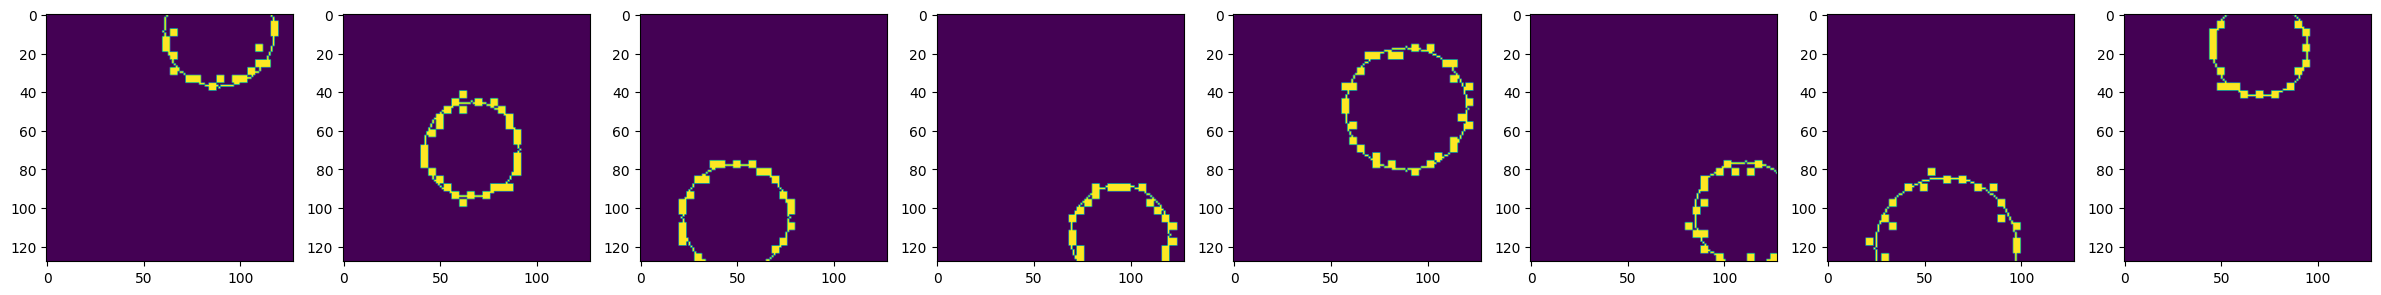

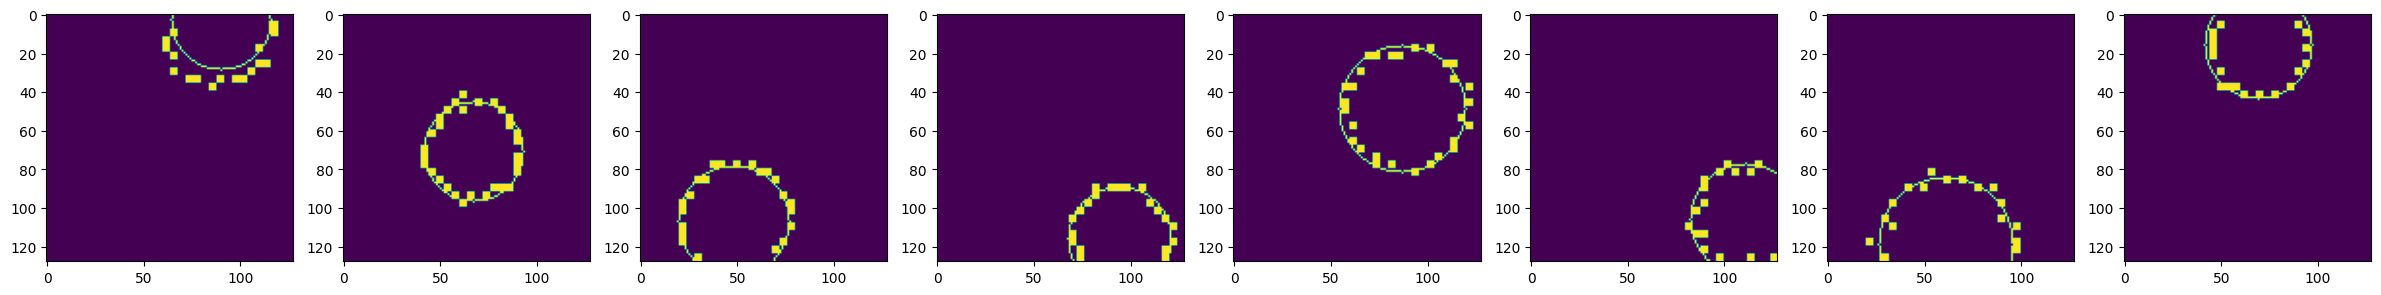

In [3]:
## train model
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='MeanAbsoluteError', metrics='accuracy')
model.fit(displays, params, batch_size=100, epochs=30, validation_split=0.2)

compare_true_and_predict(displays_test, params_test, model, 8)